# TensorFlow

-   Used on Machine Learning and Deep Learning (Considered better)

-   Created by Google

-   Uses both CPU and GPU

Does not work well with .csv or .xlxs, it works with Tensors

In [48]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
import seaborn as sns
import pandas as pd
sns.set()

### Random Data Generation

In [40]:
observations = 1000

xs = np.random.uniform(low=-10,high=10,size=(observations,1)) #(lowest point, highest point, interval)
zs = np.random.uniform(-10,10,(observations,1)) #the variables do not need to be declared, just specified in the correct order

rd_inputs = np.column_stack((xs,zs)) #combining xs and zs

noise = np.random.uniform(-1,1,(observations,1))

# arbitrary target function 
rd_targets = 2*xs-3*zs+5+noise # the noise is to add a little of randomization to the data so it wont be perfect

np.savez('TF_intro', inputs=rd_inputs,targets=rd_targets) #Saving the data as a Tensor 

## Solving with TensorFlow - Simple NN Linear model

In [41]:
training_data = np.load('TF_intro.npz') #loading the tensor file

In [42]:
input_size = 2 # 2 input variables xs and zs
output_size = 1 # only one output 'y'

model = tf.keras.Sequential([ #TensorFlow2 is based on Keras, this methods takes inputs, applyies a simple linear transformation and provides outputs
    tf.keras.layers.Dense(output_size) #Calculates the dot product of the inputs and weights, and adds the biases, which consists of the 'outputs'
])  

In [43]:
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02) #there are several options of optimazer and custom parameters on TensorFlow library 


model.compile(optimizer=custom_optimizer,  #if we wanted to use the default optimizer it would be => optimizer='sgd' instead of the created variable
              loss='mean_squared_error') # the mean square error corresponds to the loss function


model.fit(training_data['inputs'], training_data['targets'], # 'inputs' and 'targets' are the names given to the columns on the tensor file
          epochs=100, verbose=2) # Epochs = number of iterations and verbose is to display of not the progression of the epochs (when verbose=1 we don't need to put it on the code, since it is already 1 by default)

Epoch 1/100
32/32 - 0s - loss: 56.5795 - 248ms/epoch - 8ms/step
Epoch 2/100
32/32 - 0s - loss: 1.1171 - 20ms/epoch - 636us/step
Epoch 3/100
32/32 - 0s - loss: 0.4296 - 23ms/epoch - 728us/step
Epoch 4/100
32/32 - 0s - loss: 0.3838 - 23ms/epoch - 713us/step
Epoch 5/100
32/32 - 0s - loss: 0.3728 - 23ms/epoch - 713us/step
Epoch 6/100
32/32 - 0s - loss: 0.4074 - 22ms/epoch - 697us/step
Epoch 7/100
32/32 - 0s - loss: 0.3631 - 25ms/epoch - 775us/step
Epoch 8/100
32/32 - 0s - loss: 0.3617 - 21ms/epoch - 651us/step
Epoch 9/100
32/32 - 0s - loss: 0.3551 - 22ms/epoch - 682us/step
Epoch 10/100
32/32 - 0s - loss: 0.3665 - 22ms/epoch - 682us/step
Epoch 11/100
32/32 - 0s - loss: 0.3970 - 23ms/epoch - 713us/step
Epoch 12/100
32/32 - 0s - loss: 0.3924 - 21ms/epoch - 667us/step
Epoch 13/100
32/32 - 0s - loss: 0.3877 - 22ms/epoch - 697us/step
Epoch 14/100
32/32 - 0s - loss: 0.3762 - 22ms/epoch - 682us/step
Epoch 15/100
32/32 - 0s - loss: 0.3946 - 23ms/epoch - 713us/step
Epoch 16/100
32/32 - 0s - loss: 0.

### Extracting weights and biases

In [44]:
model.layers[0].get_weights()  #on the output we can see it successfully discovered the values of the target function => 2*xs-3*zs+5+noise

#the algorithm successfully learned the underlying relationship

[array([[ 2.0035703],
        [-3.0886648]], dtype=float32),
 array([5.0154223], dtype=float32)]

### Predicting values

In [50]:
predicted_values = model.predict_on_batch(training_data['inputs']).round(1) #it will provide an output for each input
predicted_values

array([[ 21.2],
       [ 29.8],
       [-30. ],
       [ 18.5],
       [ -8.8],
       [ -4.9],
       [ 30.4],
       [ -5.2],
       [-34.2],
       [ -0. ],
       [ 38.1],
       [ -3.2],
       [ 25.1],
       [  0.4],
       [-14.6],
       [ 27.5],
       [ -7.1],
       [ 18.6],
       [  4.7],
       [-21.2],
       [-12.8],
       [  1.3],
       [-33.2],
       [ -6.7],
       [ 10.6],
       [ -9.9],
       [  8.3],
       [ -9. ],
       [ 26.2],
       [ 27.5],
       [-22.6],
       [ 10.8],
       [  2.2],
       [ 28.6],
       [  4.2],
       [ 26. ],
       [ 18.2],
       [ 26. ],
       [ 29.4],
       [ 38.2],
       [  9.6],
       [ 37.8],
       [ 45.8],
       [-29.7],
       [-33.4],
       [ -3.8],
       [ 24.3],
       [-38.8],
       [ -0.2],
       [ 31.9],
       [-22.3],
       [ 24.2],
       [  0.6],
       [ 50.7],
       [  2.2],
       [-10.1],
       [ 34.3],
       [-15.1],
       [  7.4],
       [  1.9],
       [-13.8],
       [ 45.2],
       [

In [55]:
targets = training_data['targets'].round(1) # the real targets for comparison with the predicted ones
targets

array([[ 21.2],
       [ 29. ],
       [-30.1],
       [ 17. ],
       [ -7.9],
       [ -5.2],
       [ 30.1],
       [ -4.1],
       [-32.9],
       [  1.2],
       [ 37.3],
       [ -2.6],
       [ 24.5],
       [ -0. ],
       [-15. ],
       [ 26.6],
       [ -7.4],
       [ 19.3],
       [  4.3],
       [-21.3],
       [-12.8],
       [  0.7],
       [-32. ],
       [ -6.6],
       [ 11.3],
       [ -9.4],
       [  8.6],
       [ -9.5],
       [ 26.1],
       [ 26.2],
       [-22.9],
       [ 11.1],
       [  1.9],
       [ 28.3],
       [  3.1],
       [ 24.4],
       [ 16.9],
       [ 25.7],
       [ 28.3],
       [ 38.2],
       [  8.9],
       [ 36.5],
       [ 45.6],
       [-28.7],
       [-31.9],
       [ -4.1],
       [ 24.2],
       [-38.2],
       [  0.4],
       [ 31.4],
       [-22. ],
       [ 23.7],
       [  1.6],
       [ 49.6],
       [  2. ],
       [-10. ],
       [ 34.8],
       [-15.2],
       [  6.2],
       [  2.5],
       [-13.4],
       [ 44.6],
       [

### Plotting the targets vs the predicted outputs

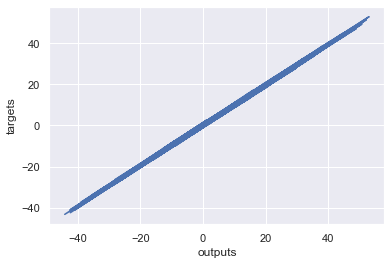

In [56]:
plt.plot(np.squeeze(predicted_values), np.squeeze(targets))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()